#Descrição

O código a seguir executa o algoritmo para o problema 3SAT

A partir de 40 variáveis a execução se torna lenta devido aos piores casos, mas com menos de 40 variáveis a visualização gráfica é melhor

Cada execução também pode gerar gráficos diferentes, já que a cada execução as cláusulas são diferentes

#Import de bibliotecas

In [35]:
import random
import time
import matplotlib.pyplot as plt

# Defina aqui até quantas variáveis serão utilizadas

In [36]:
qtdeVariaveisParaTeste = 40

#Função 3SAT e classes para representar as variáveis e clausulas

In [37]:
class Variavel:
    nome = None
    valor = None

    def __init__(self, nome):
        self.nome = nome
        self.valor = -1

class Clausula:
    var1 = None
    var2 = None
    var3 = None
    comp1 = None
    comp2 = None
    comp3 = None

    def __init__(self):
        self.comp1 = random.randint(0, 1)
        if self.comp1 == 0:
            self.comp1 = -1

        self.comp2 = random.randint(0, 1)
        if self.comp2 == 0:
            self.comp2 = -1

        self.comp3 = random.randint(0, 1)
        if self.comp3 == 0:
            self.comp3 = -1


    def isTrue(self):
        if (self.var1.valor * self.comp1 == 1 
            or self.var2.valor * self.comp2 == 1 
            or self.var3.valor * self.comp3 == 1):
            return True
        else:
            return False

    def printClausula(self):
        print("( " + str(self.var1.nome * self.comp1) + " || " + str(self.var2.nome * self.comp2) + " || " + str(self.var3.nome * self.comp3) + " )")

def IIISAT(listaClausula, listaVariavel):
    #Verifica cada possíbilidade para valores das variáveis
    inicio = time.time()
    i = 0
    while(i < (2**len(listaVariavel))):
        '''print("qtdeClausulas: " + str(len(listaClausula)))
        print("qtdeVariaveis: " + str(len(listaVariavel)))
        print("Possibilidade " + str(i+1))
        print("")'''

        realizaTeste = True

        #Verifica se as clausulas são todas verdadeiras
        j = 0
        while j < len(listaClausula) and realizaTeste:
            if listaClausula[j].isTrue() == False:
                realizaTeste = False
            j+=1

        #for variavel in listaVariavel:
        #    print(variavel.valor)
        #print("")

        #Se todas as clausulas são verdadeiras, encontrou uma solução
        if realizaTeste:
            for variavel in listaVariavel:
                variavel.valor = -1
            fim = time.time();
            return True, fim-inicio, i+1
        
        #Não encontrou solução ainda. Utiliza nova possíbilidade 
        p = 0
        while p < len(listaVariavel):
            if i%(2**p) == 0:
                listaVariavel[p].valor *= -1
            p+=1

        i+=1

    for variavel in listaVariavel:
        variavel.valor = -1
    fim = time.time();
    return False, fim-inicio, i+1


#Execução dos testes

Qtde Variaveis: 3
Qtde Clausulas: 1
Tem solução: True
Possíbilidades analisadas: 1
Tempo de execução: 7.3909759521484375e-06
( 3 || -1 || -2 )

Qtde Variaveis: 4
Qtde Clausulas: 2
Tem solução: True
Possíbilidades analisadas: 1
Tempo de execução: 7.152557373046875e-06
( 2 || -4 || -3 )
( -1 || -1 || -2 )

Qtde Variaveis: 5
Qtde Clausulas: 2
Tem solução: True
Possíbilidades analisadas: 1
Tempo de execução: 6.4373016357421875e-06
( 4 || -5 || -2 )
( -3 || -1 || -1 )

Qtde Variaveis: 6
Qtde Clausulas: 2
Tem solução: True
Possíbilidades analisadas: 1
Tempo de execução: 5.7220458984375e-06
( 5 || -3 || -1 )
( -4 || -2 || -6 )

Qtde Variaveis: 7
Qtde Clausulas: 3
Tem solução: True
Possíbilidades analisadas: 1
Tempo de execução: 6.9141387939453125e-06
( 2 || -1 || -7 )
( -5 || -4 || -6 )
( 3 || -6 || -1 )

Qtde Variaveis: 8
Qtde Clausulas: 3
Tem solução: True
Possíbilidades analisadas: 1
Tempo de execução: 6.67572021484375e-06
( 8 || -1 || -6 )
( -2 || -4 || -5 )
( 3 || -7 || -1 )

Qtde Variav

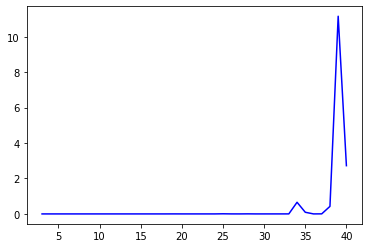

In [41]:
qtdeVariaveisUsadas = []
tempo = []

listaVar = [Variavel(1), Variavel(2), Variavel(3)]
listaClausula = []

novaClausula = Clausula()
novaClausula.var1 = listaVar[0]
novaClausula.var2 = listaVar[1]
novaClausula.var3 = listaVar[2]

listaClausula.append(novaClausula)

qtdeVariaveis = 3
qtdeClausulas = 1

while qtdeVariaveis <= qtdeVariaveisParaTeste:
    qtdeVariaveisUsadas.append(qtdeVariaveis)

    variaveisDisponiveis = listaVar.copy()
    for clausula in listaClausula:
        #se todas as variaveis já foram usadas, permite repetir
        if len(variaveisDisponiveis) == 0:
            variaveisDisponiveis = listaVar.copy()
        clausula.var1 = variaveisDisponiveis.pop(random.randint(0, len(variaveisDisponiveis) - 1))

        #se todas as variaveis já foram usadas, permite repetir
        if len(variaveisDisponiveis) == 0:
            variaveisDisponiveis = listaVar.copy()
        clausula.var2 = variaveisDisponiveis.pop(random.randint(0, len(variaveisDisponiveis) - 1))

        #se todas as variaveis já foram usadas, permite repetir
        if len(variaveisDisponiveis) == 0:
            variaveisDisponiveis = listaVar.copy()
        clausula.var3 = variaveisDisponiveis.pop(random.randint(0, len(variaveisDisponiveis) - 1))

    #imprime as clausulas
    #input()
    print("Qtde Variaveis: " + str(qtdeVariaveis))
    print("Qtde Clausulas: " + str(qtdeClausulas))
    retorno = IIISAT(listaClausula, listaVar)
    tempo.append(retorno[1])
    print("Tem solução: " + str(retorno[0]))
    print("Possíbilidades analisadas: " + str(retorno[2]))
    print("Tempo de execução: " + str(retorno[1]))
    for clausula in listaClausula:
        clausula.printClausula()
    print("")

    if (qtdeVariaveis/qtdeClausulas == 3):
        listaClausula.append(Clausula())
        qtdeClausulas += 1

    qtdeVariaveis += 1
    listaVar.append(Variavel(qtdeVariaveis))

print("Tempo de execução:")
plt.plot(qtdeVariaveisUsadas, tempo, color = 'blue')
plt.show()